In [1]:
from os import walk
from PIL import Image
import numpy as np
from numpy import asarray
import matplotlib
import matplotlib.pyplot as plt

tomato3_path = '../Datasets/train/Tomato 3/'

filenames = next(walk(tomato3_path), (None, None, []))[2]  # [] if no file

img = Image.open(tomato3_path + filenames[0])

color_data = asarray(img)

red_channel = color_data
blue_channel = color_data
green_channel = color_data

print(type(color_data[0]))
print("normal color array", color_data)

<class 'numpy.ndarray'>
normal color array [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [2]:
red_array = []
blue_array = []
green_array = []
for pixel in red_channel:
    for element in pixel:
        #Red color channel
        if(element[0] == 255 or element[1] == 255 or element[2] == 255):
            element[0] = 0
            element[1] = 0
            element[2] = 0

#Hvor alle tre kolonner er 255 sæt til 0 (hvid til sort)
#Split hver kolonne til et nyt np array med kun værdier fra den valgte kolonne
# Kolonne1: R, Kolonne2: G, Kolonne3: B


In [3]:
#Printing red channel
print(red_channel)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


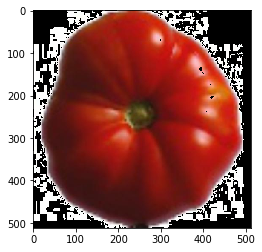

In [4]:
#Displaying red channel
plt.imshow(red_channel, interpolation='nearest')

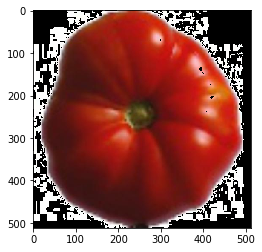

In [5]:
#Displaying normal channel
plt.imshow(color_data, interpolation='nearest')

In [6]:
for filename in filenames:
    img = Image.open(tomato3_path + filename)
    
    imgGray = img.convert('L')
    imgGray.save('../Datasets/train/Grey/Tomato 3/' + filename)
    
    # Split into 3 channels
    r, g, b = img.split()

    # Decrease green and blue
    redG = g.point(lambda i: i * 0.00001)
    redBb = b.point(lambda i: i * 0.00001)
    
    imgRed = Image.merge('RGB', (r, redG, redBb))
    imgRed.save('../Datasets/train/Red/Tomato 3/' + filename)
    
    greenR = r.point(lambda i: i * 0.00001)
    greenb = b.point(lambda i: i * 0.00001)
    
    imgGreen = Image.merge('RGB', (greenR, g, greenb))
    imgGreen.save('../Datasets/train/Green/Tomato 3/' + filename)
    
    blueRed = r.point(lambda i: i * 0.00001)
    blueGreen = g.point(lambda i: i * 0.00001)
    
    imgBlue = Image.merge('RGB', (blueRed, blueGreen, b))
    imgBlue.save('../Datasets/train/Blue/Tomato 3/' + filename)
    